In [140]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [141]:
# загрузим данные
df = pd.read_csv('data/pokemon.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<Axes: xlabel='Attack', ylabel='Defense'>

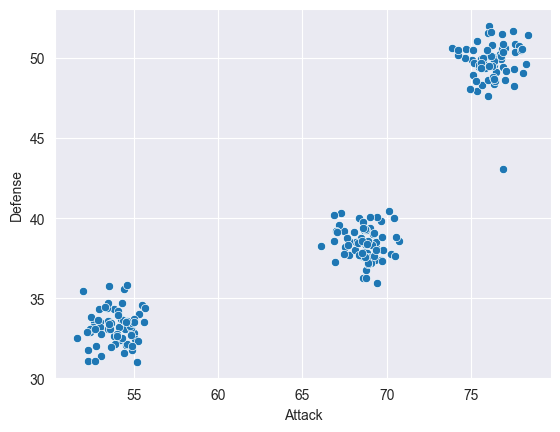

In [142]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<Axes: xlabel='Attack', ylabel='Defense'>

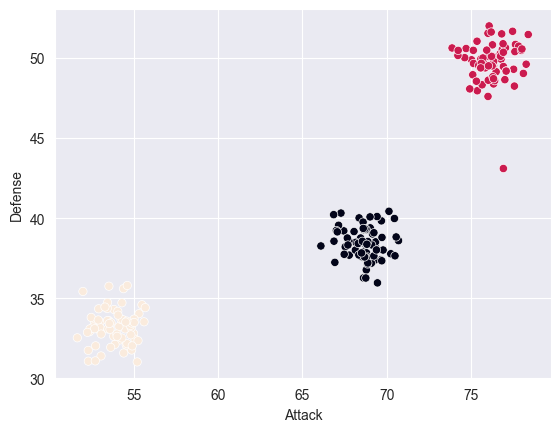

In [143]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Вроде неплохо, но давайте посмотрим, может если увеличить количество кластеров станет лучше

<Axes: xlabel='Attack', ylabel='Defense'>

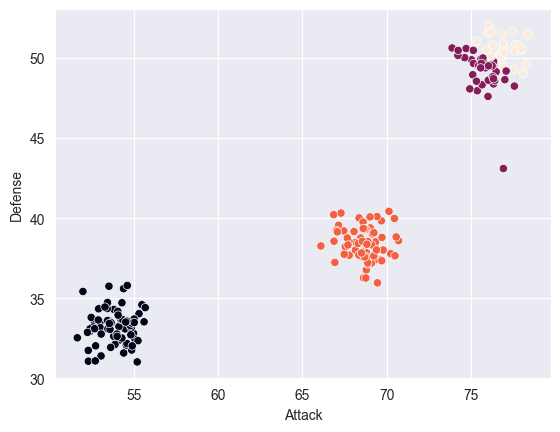

In [144]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в $n$-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

Вроде неплохо, но явно есть точки, которые находятся вдалеке от основных кластеров. Например, 2 фиолетовые точки 

В трёхмерном и другом $n$-мерном случае кластеризация запускается следующим образом:

In [145]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

### НЕДОСТАТКИ АЛГОРИТМА K-MEANS

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

### ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

→ Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим **метод локтя** и **коэффициент силуэта**.

## Выбор количества кластеров с помощью метода локтя

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**.

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

<Axes: xlabel='cluster', ylabel='inertia'>

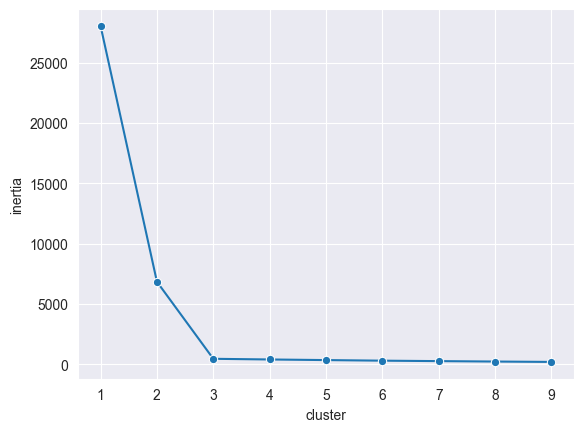

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

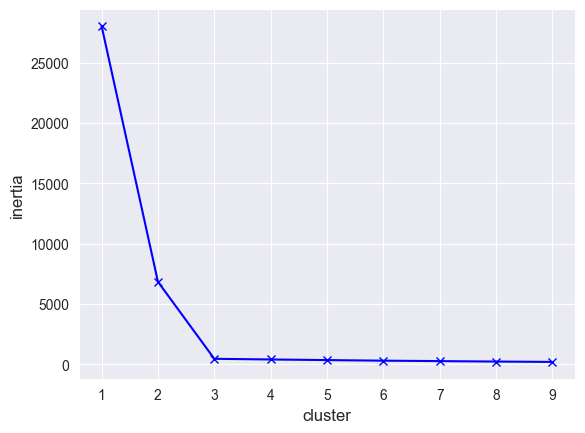

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Как можно заметить из графика, на сгибе k=3. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко:



Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

## Выбор количества кластеров с помощью коэффициент силуэта

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.



<Axes: xlabel='cluster', ylabel='silhouette'>

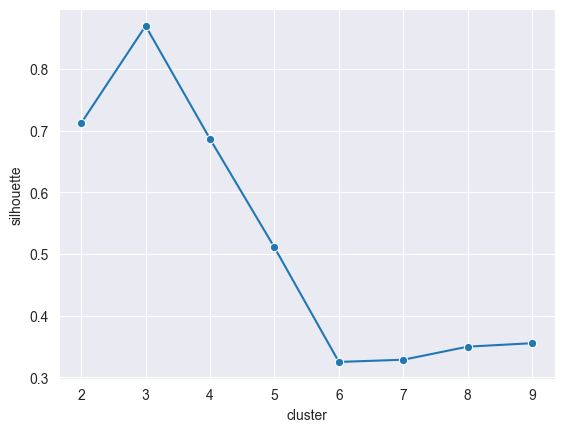

In [148]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно минимум два кластера, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

Вам как специалисту по анализу данных поступили [показания с прибора](https://lms-cdn.skillfactory.ru/assets/courseware/v1/89b083afa0b2aa24e00b10aaa523fbce/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/values_from_the_instrument.zip), измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [149]:
# загрузим данные
df_instrument = pd.read_csv('data/values_from_the_instrument.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df_instrument.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


In [150]:
def get_optim_clust(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df_instrument[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_optim_clust(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

<Axes: xlabel='cluster', ylabel='silhouette'>

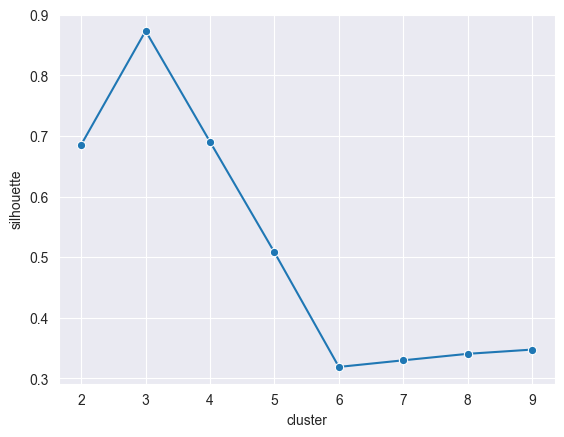

In [151]:
# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Итак, подбирать оптимальное количество кластеров мы научились. Но как оценить, насколько хорошие кластеры у нас получились?

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

## Метрики

Существует ряд метрик, которые можно подсчитать, **если данные размечены**. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

#### $\odot$ ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)

Данная метрика, как и три последующих, может применяться, только когда есть размеченные данные.

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

Теперь посмотрим, как рассчитать метрику однородности в sklearn. Рассмотрим два случая комбинаций ответов модели и истинных кластеров объектов. В первом случае ответы модели будут полностью совпадать с истинными ответами, а во втором будут полностью противоположны им:

In [152]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [153]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:

labels_true — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с labels_true.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

In [154]:
# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

#### $\odot$ ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

![]()

На рисунке выше c — это completeness, или полнота.

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [155]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))


1.0


In [156]:
# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

#### $\odot$ V-МЕРА (V-MEASURE)

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

In [157]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score


# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


В первом случае и полнота, и однородность кластеров были равны 1, поэтому V-мера, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна 0.83, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении V-меры, но, так как однородность кластеров имела максимальное значение,V-мера приняла значение 0.9.

#### $\odot$ ИНДЕКС РЭНДА

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

In [158]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.94643618280843


Индекс Рэнда показывает долю объектов датасета, для которой мы правильно предсказали кластер. В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

## Юнит 2. Другие методы кластеризации

Алгоритмов кластеризации настолько много, что по ним можно сделать отдельный курс. И, как вы можете догадаться, не существует такого метода кластеризации, который всегда будет выдавать хорошие результаты — всё зависит от того, с какими данными вы работаете.

На сегодняшний день существует более 40 видов кластеризации, но общепринятой системы классификации алгоритмов кластеризации не существует.

В этом и последующих юнитах мы познакомимся с некоторыми популярными алгоритмами кластеризации:

* **иерархической кластеризацией**,
* **EM-алгоритмами кластеризации**,
* **спектральной кластеризацией**,
* **кластеризацией на основе плотности**.

### ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится **дендрограмма**. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви.

**Дендрограмма** — это древовидная диаграмма, которая содержит $n$ уровней. Каждый уровень — это шаг укрупнения кластеров.

Чем больше схожесть между двумя объектами на дендрограмме, тем ниже высота внутренней ветки, которая идёт из объекта или кластера:

На дендрограмме выше Сельма и Пэтти Бувье, сёстры Мардж Симпсон, похожи друг на друга, поэтому высота соединяющей их внутренней ветки маленькая, а сама Мардж не похожа на своих сестёр, поэтому высота внутренней ветки гораздо больше.

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

Справа расположены **листья** дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (корень дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 

Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: агломеративный и дивизионный. В первом случае кластеры образуются снизу вверх, т.е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами.

В общем виде матрица сходства выглядит следующим образом:

$K$ — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

В зависимости от того, каким способом рассчитывается расстояние, можно получить разные результаты кластеризации.

На картинке ниже рассматривается иерархическая кластеризация при использовании разных подходов для подсчёта расстояния

В первом столбце представлено использование метода одиночной связи, во втором — метода средней связи, в третьем — метода полной связи.

Различные кластеры обозначены разными цветами: оранжевым, зелёным и синим. 

Как видим, иерархическая кластеризация с использованием метода одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров: это можно наблюдать в третьей, четвёртой и шестой строках части Single Linkage на картинке — мы видим очень редкие вкрапления зелёного кластера, а всё остальное пространство принадлежит синему кластеру.

Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

#### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?

* Для построения филогенетического дерева. Например, если известна ДНК-последовательность, можно построить филогенетическое дерево.
* Для анализа текстов. Например, с помощью кластеризации Брауна (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере.

#### КАК ЗАПУСТИТЬ ИЕРАРХИЧЕСКУЮ КЛАСТЕРИЗАЦИЮ?

Давайте попробуем кластеризовать датасет с покемонами с помощью иерархической кластеризации.

Запустим алгоритм (такой же, как k-means). Из библиотеки sklearn импортируем алгомеративную кластеризацию, далее запустим метод fit(), передав вектор X из признаков объектов, и обучим модель кластеризации.

Базовые параметры, которые необходимо передать в AgglomerativeClustering:

* n_clusters — количество кластеров; по умолчанию — 2.
* linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

In [159]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

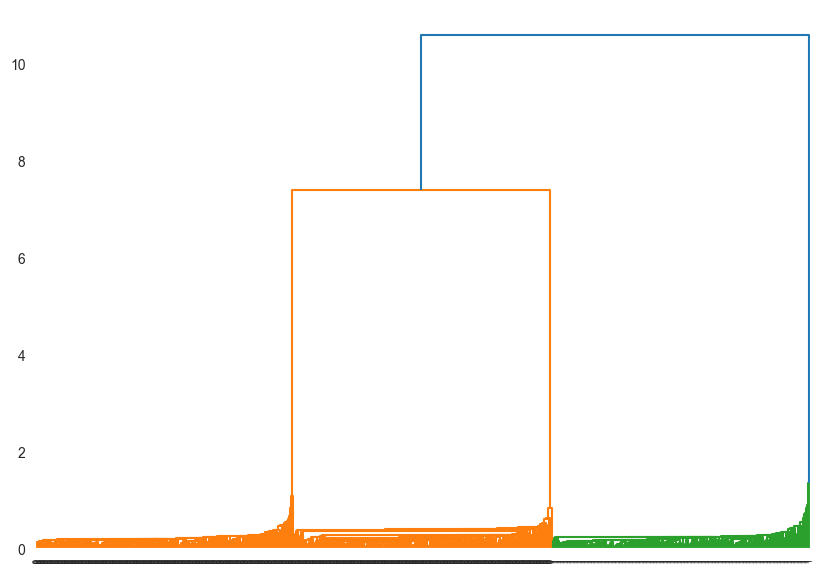

In [160]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

#### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ

$+$

* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

$-$

* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

## GMM кластеризация

Когда данные распределены в форме вытянутых эллипсов, алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

![gif](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

#### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?

$\sim$ K-means-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/87f49d3de56e2d6aabb85e84ffe8d8a7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_19.png)

$\sim$ GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/6982bc045abe8c62e8dcf60e72e4d646/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_20.png)

$\sim$ Используя GMM, можно анализировать временные ряды цен в периоды действия акций.

#### КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [161]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* n_components — количество кластеров.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации sklearn:

In [162]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
'''Help on class GaussianMixture in module 
sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)'''

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

'Help on class GaussianMixture in module \nsklearn.mixture._gaussian_mixture:\n\nclass GaussianMixture(sklearn.mixture._base.BaseMixture)'

<Axes: xlabel='Attack', ylabel='Defense'>

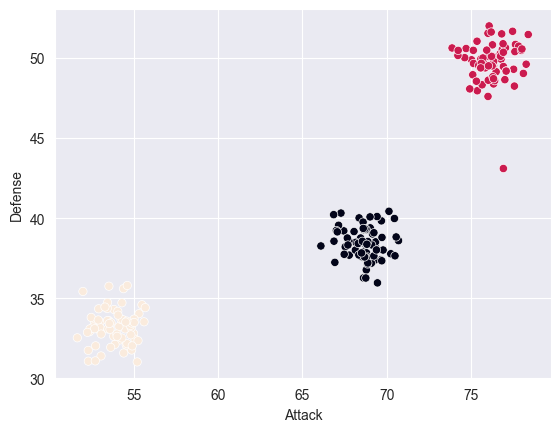

In [164]:
X = df[['Attack', 'Defense']]

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
# sns.set_style("white")
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

Алгоритм отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными. Как видим, есть также одна точка-выброс, которую алгоритм не выделил в отдельный кластер.

Если выбрать количество кластеров, равное 4, получим следующий результат:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/4c4f05ac7798f7e2b089b3e544f3ce6a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_22.png)

Как мы видим, в данном случае алгоритм тоже не выделил выброс в отдельный класс, но с кластеризацией также справился отлично.

#### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

$+$

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/32f24c20454faf47ee135cc0d6110e04/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_23.png)
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/afd530fb94ba7c77894c10464c118596/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_24.png)

$-$

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

У нас есть [датасет](https://lms-cdn.skillfactory.ru/assets/courseware/v1/c5ffc8e0c422b2cd1ed3e2ec0b50a7b8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.zip), в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведем кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось? Три, не правда ли.

<Axes: xlabel='price', ylabel='year'>

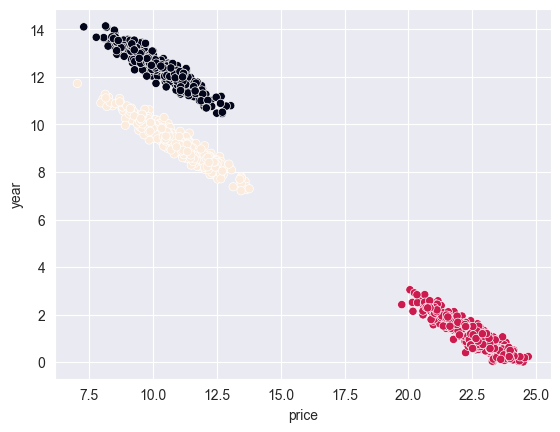

In [167]:
# загрузим данные
data = pd.read_csv('data/housing.zip')

X = data[['price', 'year']]

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
# sns.set_style("white")
sns.scatterplot(x=data.price, y=data.year, c=gm_prediction)

## Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/3a5a1a1ddd5c8d1442c0a5c031bdb2be/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_25.png)

2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/59e8b5dba044d7fa51ffeb7b060cddef/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_26.png)

3. Далее уменьшаем размерность данных.

Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/bd55daf189af48779220fa4ba1dad809/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_27.png)

Теперь одна вершина описывается одним признаком.

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.

Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/971b3acde6719f444b515f38c9f1c486/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_28.png)

Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

#### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ?

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/06144a25eddf97a09132a4b461dc4cdd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_29.png)

При желании вы можете [повторить этот эксперимент](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py) самостоятельно.

Рассмотрим это на нашем примере датасета с покемонами:

In [169]:
df.head(3)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2


In [170]:
# вызываем из sklearn SpectralClustering
from sklearn.cluster import SpectralClustering

# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

array([0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1])

<Axes: xlabel='Attack', ylabel='Defense'>

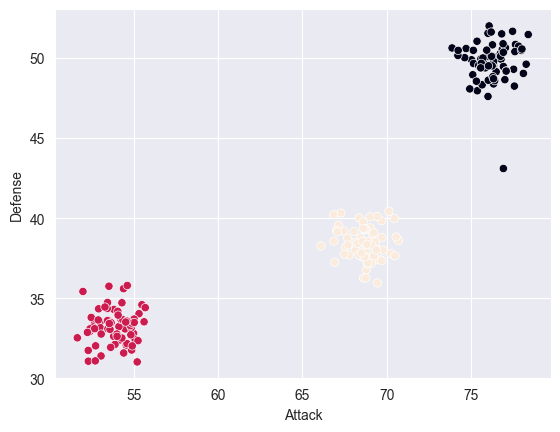

In [171]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

Основные параметры SpectralClustering:

* n_clusters — количество кластеров; по умолчанию — 8.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.
Визуализируем результаты:

Для четырёх кластеров:

In [172]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, n_init=1500, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<Axes: xlabel='Attack', ylabel='Defense'>

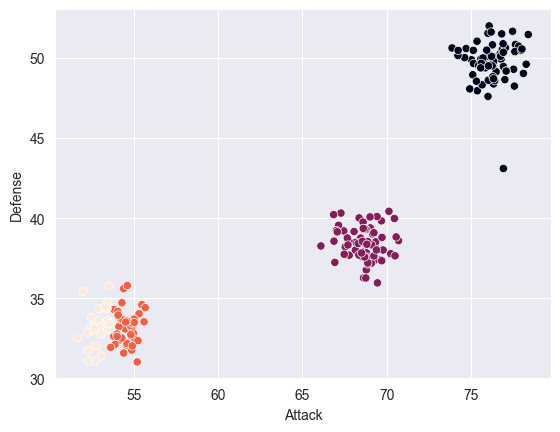

In [173]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

#### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ

$+$

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
* Эффективна для кластеризации разрежённых данных.
* Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/fb4dd3e3c7d751b63b1e610cbaf50d15/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_32.png)

$-$

* Нужно заранее задавать количество кластеров.
* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

## DBSCAN

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — **DBSCAN**. 

#### DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d0259cffa5d96e024250876cc9c79dd4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_33.png)

* в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

**Преимущества алгоритма DBSCAN**:

* В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
* Алгоритм хорошо работает с данными произвольной формы.
* DBSCAN отлично справляется с выбросами в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/eb707e7b5391cf597f144d873ca4bba6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_34.png)

Как видим, алгоритм DBSCAN хорошо справился с первыми двумя способами кластеризации, а в третьем случае результаты работы обоих алгоритмов несколько спорные. Если датасеты хорошо разделены, как в четвёртом случае, оба алгоритма справляются хорошо. Если данные образуют один участок с одинаковой плотностью данных, DBSCAN не может разделить такие данные.

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки $X = \{x_1, x_2\}$ (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/6cd2f3a32ee0f26d674c2d419aa9842b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_35.png)

Так как розовый кластер огибает синий, у стандартных методов вроде k-means могут быть трудности при кластеризации. При использовании k-means мы можем получить следующие результаты:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/70b459664cbe210d49209c11ffb98dcd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_36.png)

Алгоритм DBSCAN поможет не допустить такого.

→ Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

Рассмотрим работу алгоритма кластеризации DBSCAN ↓

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе $r$ от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/2874ac96a6e3c34c251cc5583fd1eb0d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_37.png)

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/ec279bb7e7cda505b9a555c441bae580/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_38.png)

2. Выделим центральные точки (core points).

**Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/e73a531642b7f18b3bf6e8fd9b0166a4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_39.png)

3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/3edfba34f9bd0a5bb4a76e31ce5cf773/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_40.png)

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/21f6ce62ff43cb3ea299e6d1f4e98a3e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_41.png)

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе $r$ от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/9ee6eb5db6d4d0b223b0bc405bb8b7b3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_42.png)

5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/80b02aeb8be89fd57eedb5913e160ba6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_43.png)

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

#### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ DBSCAN?

Данный алгоритм довольно популярный — областей его применения много.

* Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

* Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

* Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/2c2c1101acdbea1915db568f69e279a9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_44.png)
![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/7702d12d4eb2cb22c85e4ad4e2570a36/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml4-3_45.png)

Как мы можем заметить, алгоритм DBSCAN лучше всего справляется с задачей, выделяя сложные участки на карте.

Подробности этого исследования можно посмотреть [тут](https://habr.com/ru/company/citymobil/blog/649063/).

#### КАК ЗАПУСТИТЬ DBSCAN В SKLEARN?

Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.

In [174]:
df.head(3)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

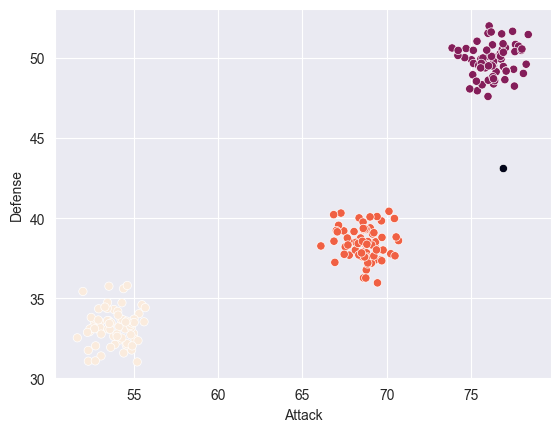

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска DBSCAN:

* eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

#### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN

$+$

* Не нужно задавать количество кластеров.

* Устойчив к шуму и выбросам, может находить выбросы в данных.
* Способен найти кластеры любой геометрической формы.

$-$

* Не может качественно кластеризовать наборы данных с большой разницей в плотности.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает сложно подобрать eps.

Для [датасета с ценами квартир](https://lms-cdn.skillfactory.ru/assets/courseware/v1/c5ffc8e0c422b2cd1ed3e2ec0b50a7b8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.zip) проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы? 2

<Axes: xlabel='price', ylabel='year'>

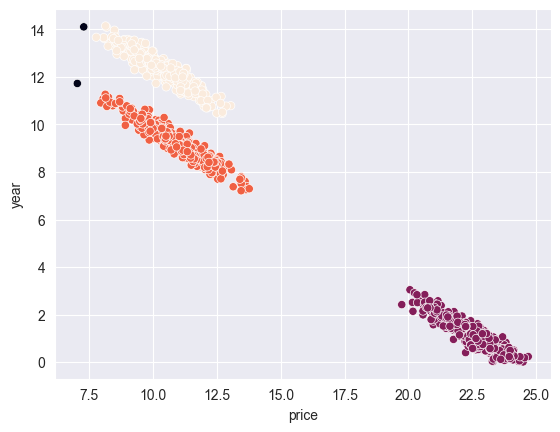

In [176]:
# загрузим данные
data = pd.read_csv('data/housing.zip')
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(data[['price', 'year']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=data.price, y=data.year, c=clustering.labels_)

В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.

Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

<Axes: xlabel='price', ylabel='year'>

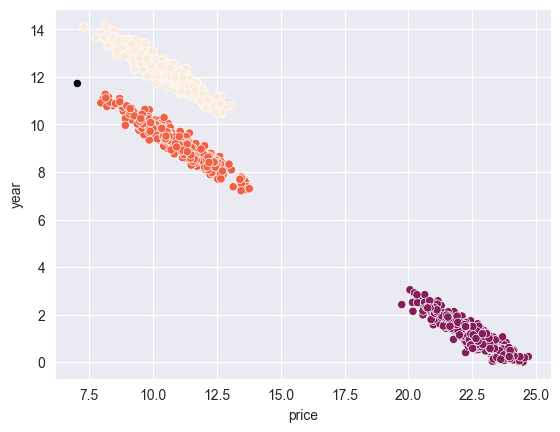

In [178]:
# загрузим данные
data = pd.read_csv('data/housing.zip')
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.7, min_samples = 6).fit(data[['price', 'year']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=data.price, y=data.year, c=clustering.labels_)

<Axes: xlabel='price', ylabel='year'>

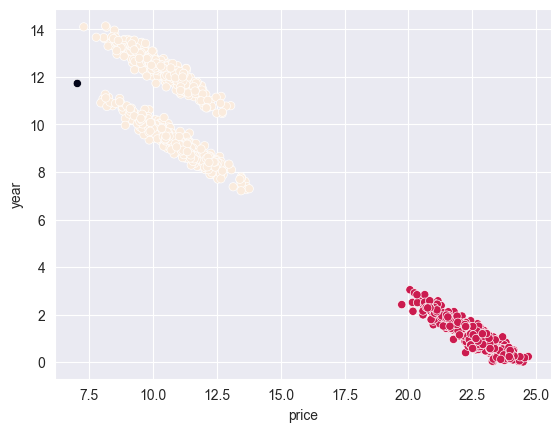

In [180]:
# загрузим данные
data = pd.read_csv('data/housing.zip')
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.7, min_samples = 5).fit(data[['price', 'year']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=data.price, y=data.year, c=clustering.labels_)